<a href="https://colab.research.google.com/github/pidannnn/Information-Retrieval/blob/main/praktikum01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd

df = pd.read_xml('/content/drive/MyDrive/KULIAH/Semester 3/Information Retrieval/datas/kompas-beritaPart1.xml')
df

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227
...,...,...,...,...,...,...,...
1497,tribunnews.com,2015/07/01,Travel,Kuliner Medan Sedap Harga Murah Meriah: Bubur ...,"TRIBUNNEWS.COM - Selain Bika Ambon, tiga kulin...",http://www.tribunnews.com/travel/2015/07/01/ku...,101
1498,tribunnews.com,2015/07/01,Travel,Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197
1499,tribunnews.com,2015/07/01,Travel,Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125
1500,tribunnews.com,2015/07/01,Travel,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [138]:
df.isna().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [139]:
def caseFolding(text):
  text = text.lower()
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
case folded: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


In [140]:
import re

def punctuationRemoval(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
punctuation removed: Terima kasih Kak Kamu sangat baik sekali kepadaku hari ini


In [141]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...
...,...,...,...,...,...,...,...,...
1497,tribunnews.com,2015/07/01,Travel,Kuliner Medan Sedap Harga Murah Meriah: Bubur ...,"TRIBUNNEWS.COM - Selain Bika Ambon, tiga kulin...",http://www.tribunnews.com/travel/2015/07/01/ku...,101,tribunnewscom selain bika ambon tiga kuliner ...
1498,tribunnews.com,2015/07/01,Travel,Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197,tribunnewscom asosiasi nirlaba internasional ...
1499,tribunnews.com,2015/07/01,Travel,Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125,laporan wartawan tribun medan silfa humairah t...
1500,tribunnews.com,2015/07/01,Travel,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95,laporan wartawan tribunnews reynas abdila trib...


In [142]:
def tokenize(text):
  text = text.split()
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


In [143]:
df['tokens'] = df['clean'].apply(tokenize)
df

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, ponsel, android, huawei, ..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, sejak, 2013, wacana, tent..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, resmi, diperkenalkan, pad..."
...,...,...,...,...,...,...,...,...,...
1497,tribunnews.com,2015/07/01,Travel,Kuliner Medan Sedap Harga Murah Meriah: Bubur ...,"TRIBUNNEWS.COM - Selain Bika Ambon, tiga kulin...",http://www.tribunnews.com/travel/2015/07/01/ku...,101,tribunnewscom selain bika ambon tiga kuliner ...,"[tribunnewscom, selain, bika, ambon, tiga, kul..."
1498,tribunnews.com,2015/07/01,Travel,Seribu Delegasi 60 Negara Akan Ikuti Pameran W...,TRIBUNNEWS.COM - Asosiasi nirlaba internasiona...,http://www.tribunnews.com/travel/2015/07/01/se...,197,tribunnewscom asosiasi nirlaba internasional ...,"[tribunnewscom, asosiasi, nirlaba, internasion..."
1499,tribunnews.com,2015/07/01,Travel,Bebek Goreng Gurihnya Mantap Saat Disantap Den...,"Laporan wartawan Tribun Medan, Silfa Humairah ...",http://www.tribunnews.com/travel/2015/07/01/be...,125,laporan wartawan tribun medan silfa humairah t...,"[laporan, wartawan, tribun, medan, silfa, huma..."
1500,tribunnews.com,2015/07/01,Travel,Kisah Haru Penjual Siomay Pink setelah Berulan...,"Laporan Wartawan Tribunnews, Reynas Abdila TRI...",http://www.tribunnews.com/travel/2015/07/01/ki...,95,laporan wartawan tribunnews reynas abdila trib...,"[laporan, wartawan, tribunnews, reynas, abdila..."


In [144]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
  for token in tokens:
    all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
132,yang,6450
9,di,5824
125,dan,4915
34,ini,2744
22,dengan,2625


In [145]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head(10)

,term,freq,rank
132,yang,6450,1
9,di,5824,2
125,dan,4915,3
34,ini,2744,4
22,dengan,2625,5
28,untuk,2583,6
30,dari,2460,7
17,itu,2437,8
96,akan,2055,9
106,dalam,1743,10


In [146]:
term_freq_df_sorted.tail(10)

,term,freq,rank
24849,salome,1,24846
24850,batunya,1,24847
24851,naga,1,24848
24852,bermodal,1,24849
24853,nekat,1,24850
24835,nyengat,1,24851
24842,booming,1,24852
24822,bangalore,1,24853
24823,jeprima,1,24854
24805,cicipilah,1,24855


In [147]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=100)

,term,freq,rank,k = f * r
132,yang,6450,1,6450
9,di,5824,2,11648
125,dan,4915,3,14745
34,ini,2744,4,10976
22,dengan,2625,5,13125
...,...,...,...,...
1111,dapat,360,96,34560
10921,republikacoid,352,97,34144
405,lain,350,98,34300
452,negara,345,99,34155


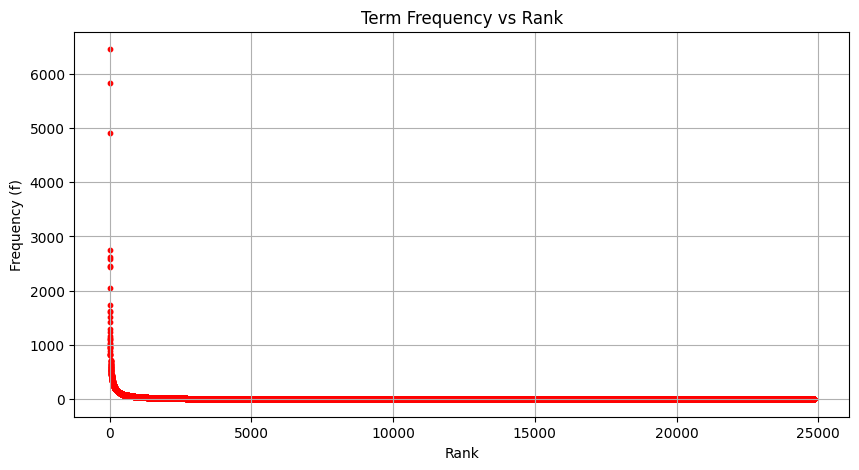

In [148]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title('Term Frequency vs Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency (f)')

plt.grid(True)
plt.show()

In [151]:
import re
from collections import Counter

# === 2. DEFINISIKAN KRITERIA KATA JANGGAL ===
def is_janggal(term):
  # jika mengandung angka
  if any(char.isdigit() for char in term):
    return False
  # jika mengandung angka atau karakter non-huruf (kecuali spasi)
  if re.search(r"[^a-zA-Záéíóúàèìòùäëïöüâêîôûçñ\s]", term):
    return True
  # jika panjang kata terlalu pendek atau panjang
  if len(term) <= 1 or len(term) > 20:
    return True
  return False

# === 3. DETEKSI KATA JANGGAL ===
janggal_df = term_freq_df_sorted[term_freq_df_sorted["term"].apply(is_janggal)]

# === 4. TAMPILKAN 10 CONTOH KATA JANGGAL ===
print("=== 10 Kata yang Janggal / Aneh ===")
print(janggal_df.tail(25)[["term", "freq", "rank"]])

=== 10 Kata yang Janggal / Aneh ===
                               term  freq   rank
21136    mempertimbangkannyasebagai     1  21167
21115      sebaliknyaforwardinggris     1  21172
21190         tempocobandungdjajang     1  21195
21274        eindhovenkedatangannya     1  21307
21560         warsiyantosumardiyono     1  21590
21641       penanggananpengendalian     1  21669
21798         terindentifikasikalau     1  21803
6934              streetgourmet_bdg     1  21857
21907       teridentifikasikeluarga     1  21943
22342        motorsportcomkecepatan     1  22346
22414       kehormatanpemberitahuan     1  22447
22518         walesonlinemillennium     1  22527
22577      footballitaliamenariknya     1  22615
6607          masyarakatnyawalaupun     1  22672
22758        schneiderlinmenanggapi     1  22765
22821       pictwittercombhvcxchrjd     1  22831
22807       pictwittercomlxqqhihtlo     1  22871
23033                 april_summerz     1  23069
6361        tegasnyamengesampingk